In [5]:
from tensorflow import keras
import numpy as np


(Xtrain,ytrain),(Xtest,ytest) = keras.datasets.mnist.load_data()
print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [6]:
# create the CNN model
cnn_model = keras.models.Sequential() # empty framework
# Convolutinal layer 1
cnn_model.add(keras.layers.Conv2D(10,3,activation='relu',input_shape=(28,28,1)))
# maxpooling -1
cnn_model.add(keras.layers.MaxPool2D((2,2)))

# Convolutinal layer 2
cnn_model.add(keras.layers.Conv2D(50,3,activation='relu'))
# maxpooling -2
cnn_model.add(keras.layers.MaxPool2D((2,2)))

# feed forwards network
cnn_model.add(keras.layers.Flatten()) # input layer
cnn_model.add(keras.layers.Dense(200,activation='relu')) # HL1
cnn_model.add(keras.layers.Dense(200,activation='relu')) # HL2
cnn_model.add(keras.layers.Dense(200,activation='relu')) # HL3
cnn_model.add(keras.layers.Dense(len(np.unique(ytrain)))) # Output layer

# optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
cnn_model.compile(optimizer='sgd',loss = loss,metrics=['accuracy'])
cnn_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 10)        100       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 50)        4550      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 50)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1250)              0         
                                                                 
 dense_4 (Dense)             (None, 200)              

In [7]:
# train the cnn along with the validation data
history = cnn_model.fit(Xtrain,ytrain,epochs=10,validation_data=(Xtest,ytest))

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.9508 - accuracy: 0.6784 - val_loss: 0.2722 - val_accuracy: 0.9146
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1497 - accuracy: 0.9531 - val_loss: 0.1215 - val_accuracy: 0.9625
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0977 - accuracy: 0.9681 - val_loss: 0.1275 - val_accuracy: 0.9586
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0753 - accuracy: 0.9761 - val_loss: 0.0925 - val_accuracy: 0.9736
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0597 - accuracy: 0.9806 - val_loss: 0.0914 - val_accuracy: 0.9732
Epoch 6/10
1875/1875 [==============================] - 55s 30ms/step - loss: 0.0483 - accuracy: 0.9840 - val_loss: 0.0956 - val_accuracy: 0.9722
Epoch 7/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0392 - accuracy: 0.9868 - val_loss: 0.1239 -

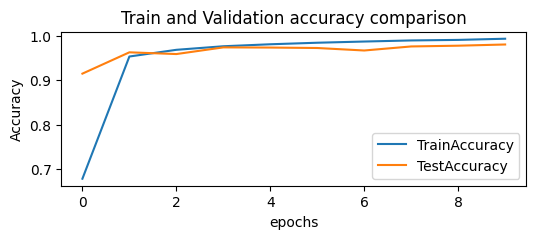

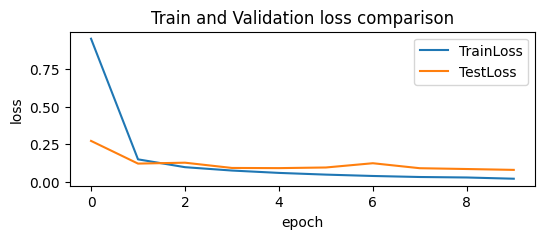

In [10]:
import matplotlib.pyplot as plt
plt.figure(1,(6,2))
plt.plot(history.epoch,history.history['accuracy'],label='TrainAccuracy')
plt.plot(history.epoch,history.history['val_accuracy'], label='TestAccuracy')
plt.title('Train and Validation accuracy comparison')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure(2,(6,2))
plt.plot(history.epoch,history.history['loss'],label='TrainLoss')
plt.plot(history.epoch,history.history['val_loss'], label='TestLoss')
plt.title('Train and Validation loss comparison')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()